<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [2]:
import pandas as pd
import numpy as np
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import matplotlib.pyplot as plt
from scipy import stats

In [3]:
# Read .tsv data using pd.read_csv
ds = pd.read_csv('Data/PS2/2281305.csv')

/home/andrea/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (4,8,9,12,15,21,22,24,26,31,33,34) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
DATE=ds.DATE.apply(lambda x:pd.to_datetime(x))

In [5]:
dfs=[ds.WND.apply(lambda x:int(x.split(',')[0])).to_frame(name='angel'),
ds.WND.apply(lambda x:int(x.split(',')[1])).to_frame(name='Q_A'),
ds.WND.apply(lambda x:x.split(',')[2]).to_frame(name='Type'),
ds.WND.apply(lambda x:float(x.split(',')[3])/10).to_frame(name='speed'),
ds.WND.apply(lambda x:int(x.split(',')[4])).to_frame(name='Q_S')]

In [6]:
WND = pd.merge(DATE,dfs[0],right_index=True,left_index=True)
for i in range(4):
    WND = pd.merge(WND,dfs[i+1],right_index=True,left_index=True)

In [7]:
WND=WND.set_index('DATE')

In [8]:
WND_pass=WND[WND.Q_S==1]
WND_comp=WND_pass['speed'].replace(999.9,np.nan).dropna()
# Completed wind speed check
WND_comp

DATE
2010-01-02 00:00:00    2.0
2010-01-02 01:00:00    1.0
2010-01-02 02:00:00    0.0
2010-01-02 03:00:00    1.0
2010-01-02 04:00:00    4.0
                      ... 
2020-09-11 17:00:00    3.0
2020-09-11 18:00:00    4.0
2020-09-11 19:00:00    3.0
2020-09-11 20:00:00    3.0
2020-09-11 21:00:00    2.0
Name: speed, Length: 111345, dtype: float64

In [9]:
mon_WND=WND_comp.resample('M').mean()

In [10]:
lin = stats.linregress(np.arange(len(mon_WND)),mon_WND.values)
lin

LinregressResult(slope=0.0048177834642934465, intercept=3.0766291708500777, rvalue=0.3679699018257282, pvalue=1.7853563483119417e-05, stderr=0.0010802897877188007)

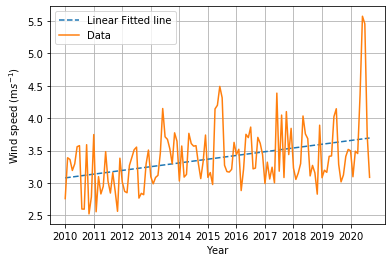

In [11]:
fig,ax = plt.subplots()
f = lambda a,b,x: b+a*x
x=np.arange(len(mon_WND))

ax.plot(x,f(lin.slope,lin.intercept,x),'--',label='Linear Fitted line')
ax.plot(x,mon_WND,label='Data')
ax.grid()
ax.set_xticks(np.arange(0,len(mon_WND),12))
ax.set_xticklabels(np.arange(2010,2021))
ax.set_xlabel('Year')
ax.set_ylabel('Wind speed (m$s^{-1}$)')
ax.legend()